In [8]:
class Node:
    def __init__(self,elem,left=None,right=None):
        self.elem=elem;self.left=left;self.right=right

In [9]:
A=Node("A")        # defining
B=Node("B")     
C=Node("C")     
D=Node("D")     
E=Node("E")
F=Node("F")
G=Node("G")
H=Node("H")

In [10]:
A.left=B      # [A = HEAD of the tree]
A.right=C
B.left=D
C.left=E
C.right=F
F.left=G
F.right=H

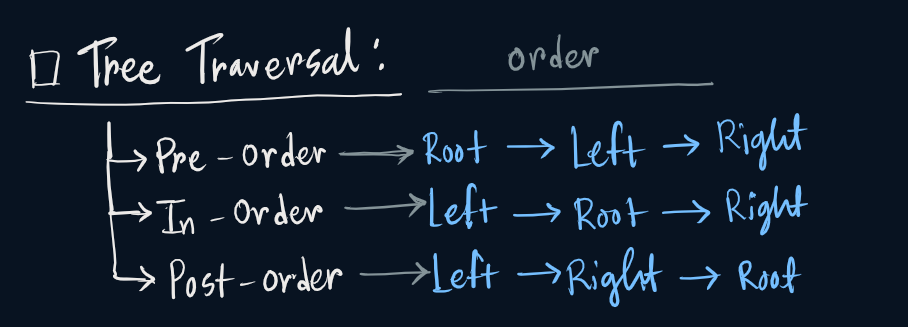

# Pre-Order #

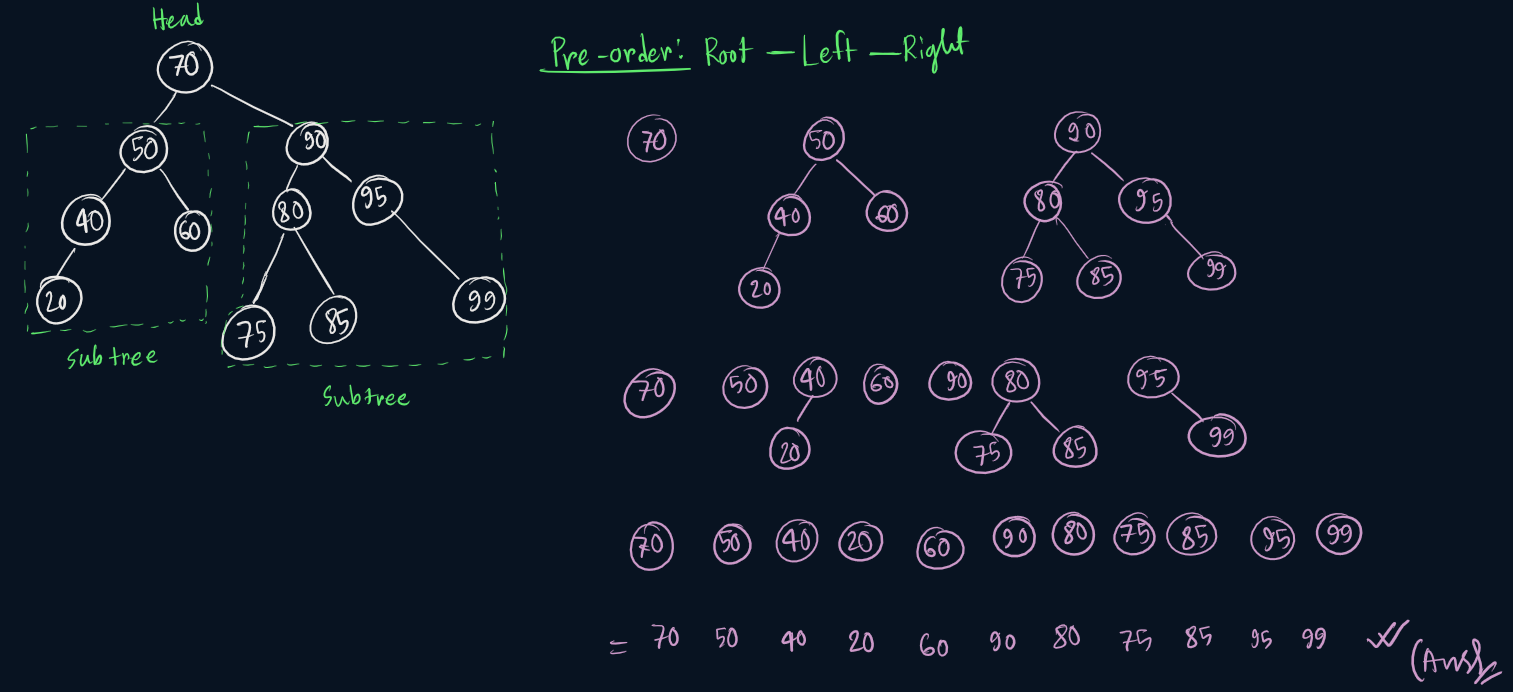

In [11]:
def preOrder(root): # root-left-right
    if root==None:
        return
    # head --> left subtree & right subtree
    print(root.elem,end=", ")
    preOrder(root.left)
    preOrder(root.right)
preOrder(A)

A, B, D, C, E, F, G, H, 

# In-Order

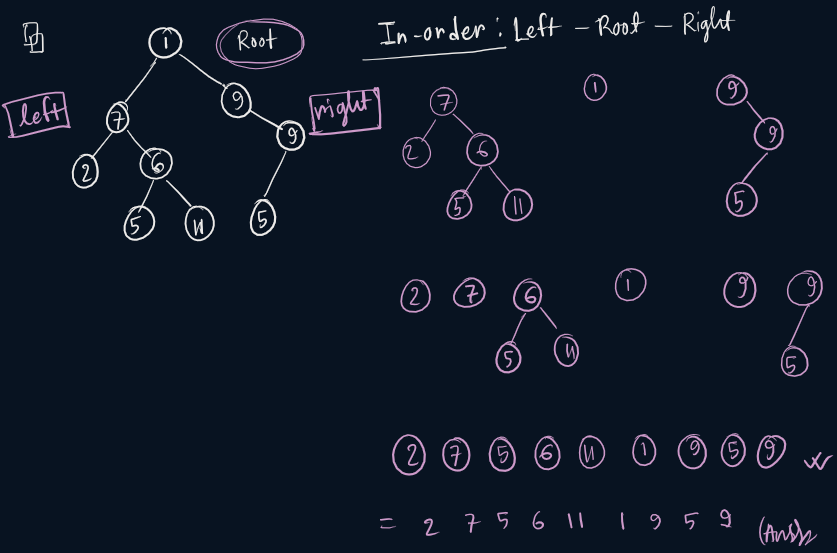

In [12]:
def InOrder(root): # left-root-right
    if root==None:
        return
    InOrder(root.left)
    print(root.elem,end=", ")
    InOrder(root.right)
InOrder(A)

D, B, A, E, C, G, F, H, 

# Post-Order

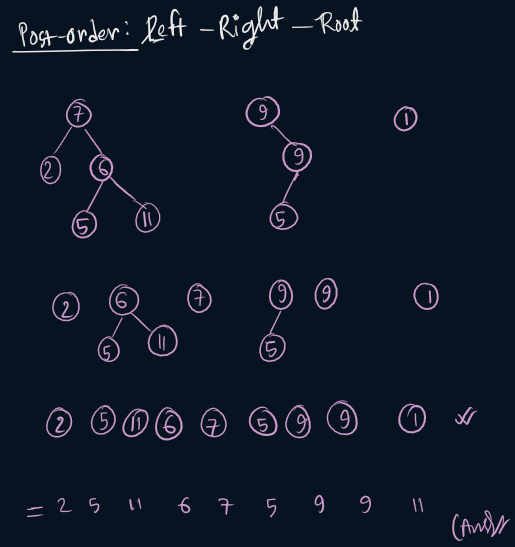

In [13]:
def postOrder(root): # left-right-root
    if root==None:
        return
    postOrder(root.left)
    postOrder(root.right)
    print(root.elem,end=", ")
postOrder(A)

D, B, E, G, H, F, C, A, 

# Creating a Tree with array

In [14]:
import numpy as np
arr=np.array([None]*16) # empty array (size=16)
arr[1]=1
arr[2]=2
arr[3]=3
arr[4]=5
arr[5]=7
arr[7]=7
arr[8]=3
arr[9]=2
arr[11]=9
arr[14]=4
arr[15]=11
print(arr)

[None 1 2 3 5 7 None 7 3 2 None 9 None None 4 11]


In [15]:
def createTree(arr,idx=1):
    if idx>=len(arr):
        return
    if arr[idx]!=None:
        root=Node(arr[idx]) # root.elem=arr[idx]
        root.left=createTree(arr,2*idx)
        root.right=createTree(arr,2*idx+1)
        return root
r=createTree(arr)

In [16]:
print("Pre-Order:")
preOrder(r)
print()
print("In-Order:")
InOrder(r)
print()
print("Post-Order:")
postOrder(r)

Pre-Order:
1, 2, 5, 3, 2, 7, 9, 3, 7, 4, 11, 
In-Order:
3, 5, 2, 2, 7, 9, 1, 3, 4, 7, 11, 
Post-Order:
3, 2, 5, 9, 7, 2, 4, 11, 7, 3, 1, 

Calculating Nodes

In [17]:
def calculateNodes(root):
    if root==None:
        return 0
    left=calculateNodes(root.left)
    right=calculateNodes(root.right)
    return left+right+1
print(calculateNodes(r))

11


Sum of the Nodes

In [18]:
def sumNodes(root): # 54
    if root==None:
        return 0
    # calculate the left and right tree
    left=sumNodes(root.left)
    right=sumNodes(root.right)
    return left+right+root.elem
print(sumNodes(r))

54


In [29]:
def sumLeftTree(root):
    if root==None:
        return 0
    left=sumLeftTree(root.left)
    left1=sumLeftTree(root.right)
    return root.elem+left+left1
print(sumLeftTree(A.left))

TypeError: can only concatenate str (not "int") to str

In [30]:
class Node:
  def __init__(self, elem, left=None, right=None):
    self.elem = elem
    self.left = left
    self.right = right

def sum_left_subtree(root):
  if root is None:
    return 0
  else:
    return root.elem + sum_left_subtree(root.left) + sum_left_subtree(root.right)

# Create the tree as defined previously
A = Node(67)
B = Node(30)
C = Node(52)
D = Node(5)
E = Node(20)
F = Node(2)
G = Node(35)
H = Node(1)
I = Node(6)

A.left = B
A.right = C
B.left = D
B.right = E
C.left = F
C.right = G
D.left = H
E.right = I

# Calculate the sum of the left subtree
left_subtree_sum = sum_left_subtree(A.left)

# Print the result
print("Sum of the left subtree:", left_subtree_sum)


Sum of the left subtree: 62


Height

In [19]:
def height(root,depth=0):
    if root==None:
        return 0
    left=height(root.left,depth+1)
    right=height(root.right,depth+1)
    return max(left,right)+1
print(height(r))

4


# Insert

In [33]:
def insert(root,insert_value):
    # if there is no element in the tree and one value got inserted
    if root==None:
        root=Node(insert_value)
        return root
    # if value exists
    # smaller
    if insert_value<root.elem: 
        root.left=insert(root.left,insert_value)
        return root
    # greater
    elif insert_value>root.elem:
        root.right=insert(root.right,insert_value)
        return root
    # equal
    else:
        print("Duplicate values can't be inserted.")
        return root

In [34]:
arr=np.array([70,50,90,40,60,80,95,20,75,85,99,70,22])
r=None
for i in range(len(arr)):
    print(f"Inserting {arr[i]}...",end=" ")
    r=insert(r,arr[i])
    print()

Inserting 70... 
Inserting 50... 
Inserting 90... 
Inserting 40... 
Inserting 60... 
Inserting 80... 
Inserting 95... 
Inserting 20... 
Inserting 75... 
Inserting 85... 
Inserting 99... 
Inserting 70... Duplicate values can't be inserted.

Inserting 22... 


In [35]:
InOrder(r)

20, 22, 40, 50, 60, 70, 75, 80, 85, 90, 95, 99, 

# Search

In [40]:
def search(root,key):
    if root==None:  # base case --- if there is not tree then it's false
        return False
    if root.elem==key:  # if equal --- found
        return True
    # key---smaller
    elif key<root.elem:
        return search(root.left,key)
    # key---greater
    else:
        return search(root.right,key)
print(search(r,75))
print(search(r,85))
print(search(r,55))

True
True
False


# Delete

In [48]:
def delete(root,key):
    if root==None:  # base case
        return root
# ----------------------------------------------
    # smaller
    if key<root.elem:
        root.left=delete(root.left,key)
        return root
    # greater
    elif key>root.elem:
        root.right=delete(root.right,key)
        return root
# ----------------------------------------------
    # found --- equal
    else:
        # if no child
        if root.left==None and root.right==None:
            return None
        # if 1 child
        elif root.left!=None and root.right==None:
            return root.left
        elif root.left==None and root.right!=None:
            return root.right
        #  if 2 child
        else: # removing --- (1)successor (2)predecessor
            x=predecessor(root.left)
            root.elem=x
            root.left=delete(root.left,x)
            return root

# ----------------------------------------------------------------

# for ----left-----
def successor(root):    #(1)
    if root.left==None:
        return root.elem
    else:
        return successor(root.left)
    
# for ----right----
def predecessor(root):  #(2)
    if root.right==None:
        return root.elem
    else:
        return predecessor(root.right)

In [45]:
d=delete(r,99)
InOrder(d)

20, 22, 40, 50, 60, 70, 75, 80, 85, 90, 95, 

In [46]:
d=delete(r,40)
InOrder(d)

20, 22, 50, 60, 70, 75, 80, 85, 90, 95, 

In [47]:
d=delete(r,70)
InOrder(d)

20, 22, 50, 60, 75, 80, 85, 90, 95, 

# Predecessor & Successor

In [1]:
# for ----left-----
def successor(root):    #(1)
    if root.left==None:
        return root.elem
    else:
        return successor(root.left)
    
# for ----right----
def predecessor(root):  #(2)
    if root.right==None:
        return root.elem
    else:
        return predecessor(root.right)